In [1]:
#Importing different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load our data

features = pd.read_csv("./dataset/features.csv", parse_dates=['Date'])
stores = pd.read_csv("./dataset/stores.csv")
train = pd.read_csv("./dataset/train.csv", parse_dates=['Date'])
test = pd.read_csv("./dataset//test.csv", parse_dates=['Date'])

In [4]:
# Explore into the dataset

print(features.shape)
print(stores.shape)
print(train.shape)

# Display the first 3 rows

print(features.head(3))
print('\n')
print(stores.head(3))
print('\n')
print(train.head(3))


(8190, 12)
(45, 3)
(421570, 5)
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392


   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False


In [5]:
# We will merge our datasets

tdf = train.merge(features, 'left').merge(stores, 'left')

In [6]:
tdf.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [7]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [8]:
# Data Description

tdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [9]:
# Percentage of missing Values

tdf.isna().sum()/len(tdf)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

MarkDown1-5: Anonymized data related to promotional markdowns that Walmart is running. Markdown data is only available after November 2011, and is not available for all stores all the time. Any missing value is marked with Null.
#since its not available, the next step should be to change the null values to '0' in representation of no promotionals


In [12]:
tdf2 = tdf.fillna(value= 0)
tdf2.isna().sum()/len(tdf)*100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
Type            0.0
Size            0.0
dtype: float64

<AxesSubplot:>

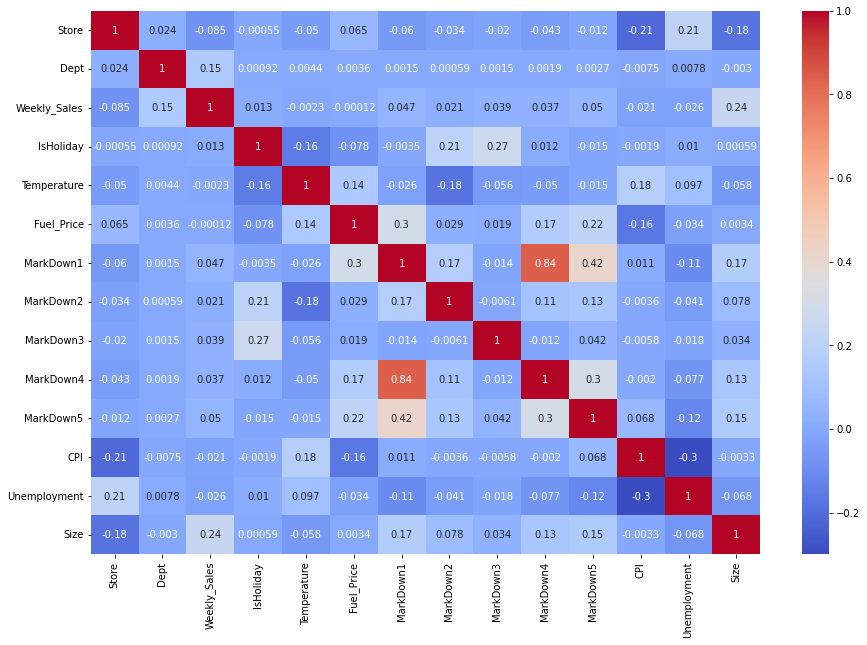

In [13]:
# identifying the correlation table
plt.figure(figsize= (15,10))
sns.heatmap(tdf2.corr(), annot= True, cmap= 'coolwarm')

/opt/anaconda3/envs/friday/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


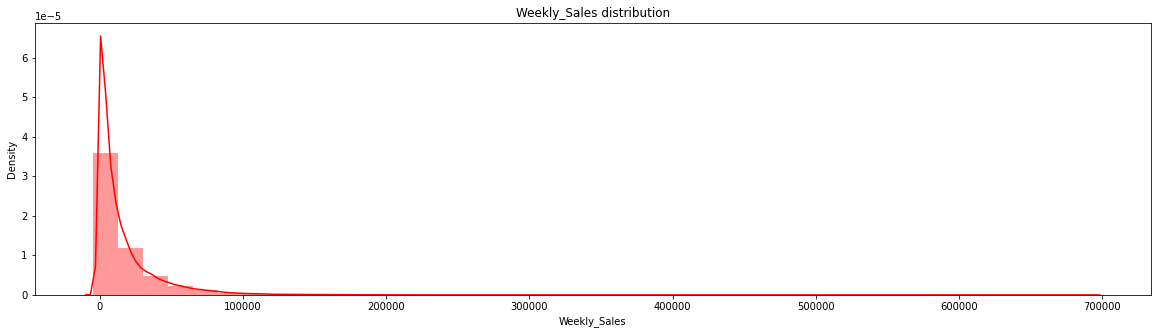

In [14]:
# DISTRIBUTION OF THE DEPENDENT VARIABLE

plt.figure(figsize=(20,5))
sns.distplot(tdf['Weekly_Sales'], bins=40, kde=True, color='red')
plt.title('Weekly_Sales distribution')
plt.show()


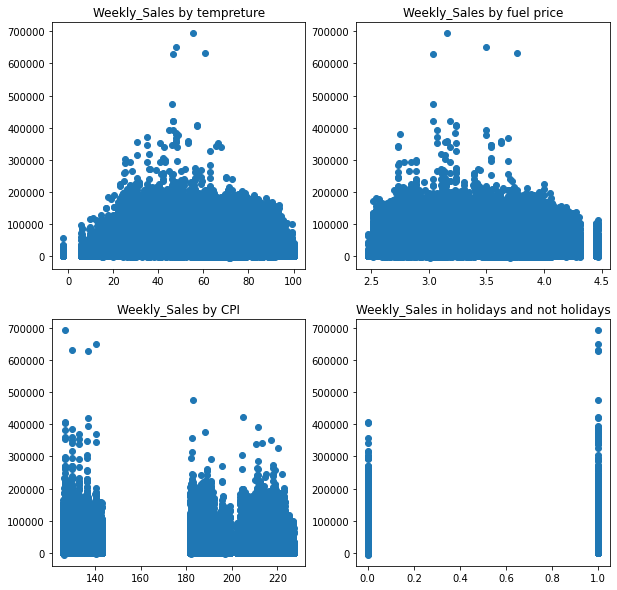

In [15]:
# Sales by different variables

fig, ax = plt.subplots(2, 2, figsize= (10,10))
ax[0,0].scatter(tdf['Temperature'], tdf['Weekly_Sales'])
ax[0,0].set_title('Weekly_Sales by tempreture')
ax[0,1].scatter(tdf['Fuel_Price'], tdf['Weekly_Sales'])
ax[0,1].set_title('Weekly_Sales by fuel price')
ax[1,0].scatter(tdf['CPI'], tdf['Weekly_Sales'])
ax[1,0].set_title('Weekly_Sales by CPI')
ax[1,1].scatter(tdf['IsHoliday'], tdf['Weekly_Sales'])
ax[1,1].set_title('Weekly_Sales in holidays and not holidays')
plt.show()
